# Homework #3: PCA/Hyperparameter/CV
Data source: http://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [2]:
data = arff.loadarff('../data/4year.arff')
df = pd.DataFrame(data[0])

In [3]:
df['bankruptcy'] = (df['class']==b'1')
df.drop(columns=['class'], inplace=True)
df.columns = ['X{0:02d}'.format(k) for k in range(1,65)] + ['bankruptcy']

In [4]:
df.describe()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,9791.000000,9791.000000,9791.000000,9749.000000,9.771000e+03,9791.000000,9791.000000,9773.000000,9792.000000,9791.000000,...,9.792000e+03,9771.000000,9791.000000,9776.000000,9791.000000,9178.000000,9760.000000,9.771000e+03,9749.000000,9561.000000
mean,0.043019,0.596404,0.130959,8.136600,6.465164e+01,-0.059273,0.059446,19.884016,1.882296,0.389040,...,7.686330e+03,-0.992263,0.035022,1.133287,0.856053,118.156064,25.194430,2.015157e+03,8.660813,35.949619
std,0.359321,4.587122,4.559074,290.647281,1.475939e+04,6.812754,0.533344,698.697015,17.674650,4.590299,...,7.605261e+04,77.007971,8.945365,8.038201,26.393305,3230.316692,1099.260821,1.171461e+05,60.838202,483.318623
min,-12.458000,0.000000,-445.910000,-0.045319,-3.794600e+05,-486.820000,-12.458000,-1.848200,-0.032371,-445.910000,...,-7.132200e+05,-7522.100000,-597.420000,-30.892000,-284.380000,0.000000,-12.656000,-1.496500e+04,-0.024390,-0.000015
25%,0.001321,0.263145,0.020377,1.047000,-5.121700e+01,-0.000578,0.003004,0.428300,1.006675,0.294440,...,2.184000e+01,0.003121,0.008768,0.885722,0.000000,5.356325,4.267700,4.323400e+01,2.938800,2.012900
50%,0.041364,0.467740,0.199290,1.591800,-5.557600e-02,0.000000,0.048820,1.088700,1.161300,0.510450,...,9.503300e+02,0.043679,0.098026,0.958305,0.002129,9.482000,6.283550,7.472900e+01,4.848900,4.041600
75%,0.111130,0.689255,0.410670,2.880400,5.573200e+01,0.065322,0.126940,2.691000,1.970225,0.714290,...,4.694550e+03,0.117170,0.242680,0.996163,0.211790,19.506000,9.938200,1.233450e+02,8.363800,9.413500
max,20.482000,446.910000,22.769000,27146.000000,1.034100e+06,322.200000,38.618000,53209.000000,1704.800000,12.602000,...,6.123700e+06,112.020000,226.760000,668.750000,1661.000000,251570.000000,108000.000000,1.077900e+07,5662.400000,21153.000000


In [5]:
sum(df.bankruptcy == True)

515

In [6]:
df.fillna(df.mean(), inplace=True)
df.isna().sum()
X_imp = df.values

In [7]:
from sklearn.model_selection import train_test_split

X, y = X_imp[:, :-1], X_imp[:, -1].astype(bool)

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [8]:
import sklearn.preprocessing as skpre

stdsc = skpre.StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
print(X_train_std.shape)
X_test_std = stdsc.transform(X_test)
print(X_test_std.shape)

(6854, 64)
(2938, 64)


## Extract 3 features using PCA method

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# and put more...

In [10]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

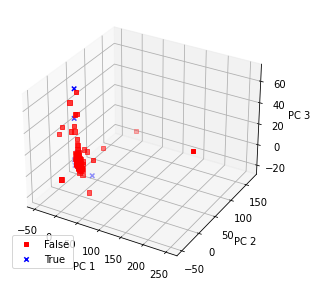

In [11]:
colors = ['r', 'b']
markers = ['s', 'x']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for l, c, m in zip(np.unique(y_train), colors, markers):
    ax.scatter(X_train_pca[y_train==l, 0],X_train_pca[y_train==l, 1],X_train_pca[y_train==l, 2],c=c, label=l, marker=m)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Apply LR / SVM / decision tree using pipeline

#### Logistic Regression

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [13]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear'))

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)
print('Test Accuracy: %.4f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.9462


#### SVM

In [14]:
pipe_svm = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        SVC(kernel='linear', C=0.1, random_state=1))

pipe_svm.fit(X_train, y_train)
y_pred_svm = pipe_lr.predict(X_test)
print('Test Accuracy: %.4f' % pipe_svm.score(X_test, y_test))

Test Accuracy: 0.9472


#### Decision Tree

In [15]:
pipe_dt = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1))

pipe_dt.fit(X_train, y_train)
y_pred_dt = pipe_dt.predict(X_test)
print('Test Accuracy: %.4f' % pipe_dt.score(X_test, y_test))

Test Accuracy: 0.9466


## 5 fold Cross-Validation using logistic regression

In [16]:
from sklearn.model_selection import StratifiedKFold

pipe_lr_cv = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear'))
kfold = StratifiedKFold(n_splits=5).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr_cv.fit(X_train[train], y_train[train])
    score = pipe_lr_cv.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.4f' % (k+1, np.bincount(y_train[train]), score))

Fold:  1, Class dist.: [5195  288], Acc: 0.9468
Fold:  2, Class dist.: [5195  288], Acc: 0.9475
Fold:  3, Class dist.: [5195  288], Acc: 0.9460
Fold:  4, Class dist.: [5195  288], Acc: 0.9482
Fold:  5, Class dist.: [5196  288], Acc: 0.9467


In [17]:
print('CV accuracy: %.4f +/- %.4f' % (np.mean(scores),np.std(scores)))

CV accuracy: 0.9470 +/- 0.0007


## Grid search

#### Logistic Regression

In [23]:
from sklearn.model_selection import GridSearchCV

pipe_lr_gd = make_pipeline(StandardScaler(),
                         PCA(n_components=3),
                         LogisticRegression(random_state=1,solver = 'liblinear'))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'logisticregression__C': param_range,
               'logisticregression__penalty': ['l1','l2']}]
gs_lr = GridSearchCV(estimator=pipe_lr_gd,
                     param_grid=param_grid,
                     scoring='accuracy',
                     cv=5,
                     refit=True,
                     n_jobs=-1)
gs_lr = gs_lr.fit(X_train, y_train)
print(gs_lr.best_score_)

0.9474759219920459


In [24]:
print(gs_lr.best_params_)

{'logisticregression__C': 0.0001, 'logisticregression__penalty': 'l1'}


#### SVM

In [ ]:
pipe_svm_gd = make_pipeline(StandardScaler(),
                         PCA(n_components=3),
                         SVC(random_state=1))
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']}]
gs_svm = GridSearchCV(estimator=pipe_svm_gd,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  refit=True,
                  n_jobs=-1)
gs_svm = gs_svm.fit(X_train, y_train)
print(gs_svm.best_score_)

In [ ]:
print(gs_svm.best_params_)

#### Decision Tree

In [ ]:
pipe_dt_gd = make_pipeline(StandardScaler(),
                         PCA(n_components=3),
                         DecisionTreeClassifier(random_state=1)
param_depth = np.arange(1,10)
param_grid = [{'decisiontreeclassifier__max_depth': param_depth,
               'decisiontreeclassifier__criterion': ['gini','entropy']}]
gs_dt = GridSearchCV(estimator=pipe_dt_gd,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=5,
                  refit=True,
                  n_jobs=-1)
gs_dt = gs_dt.fit(X_train, y_train)
print(gs_dt.best_score_)

In [ ]:
print(gs_dt.best_params_)

## Visualize the classification

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()